In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import numpy as np

# Loading data

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/data_bear'
class_names = os.listdir(data_dir)

In [ ]:
df = pd.DataFrame(columns=['path', 'label'])
pics_path = []
for cls in class_names:
  filelist = os.listdir(os.path.join(data_dir,cls))
  for file_ in filelist:
#    pics_path.append(os.path.join(data_dir,cls,file_))
    df.loc[len(df)] = os.path.join(data_dir,cls,file_),cls

In [ ]:
print(len(df))
df.head(5)

288


,path,label
0,/content/drive/MyDrive/Datasets/data_bear/blac...,black
1,/content/drive/MyDrive/Datasets/data_bear/blac...,black
2,/content/drive/MyDrive/Datasets/data_bear/blac...,black
3,/content/drive/MyDrive/Datasets/data_bear/blac...,black
4,/content/drive/MyDrive/Datasets/data_bear/blac...,black


In [ ]:
df['w_size'] = 0
df['h_size'] = 0
for i in range(len(df)):
  df['w_size'][i],df['h_size'][i] = Image.open(df.path[i]).size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


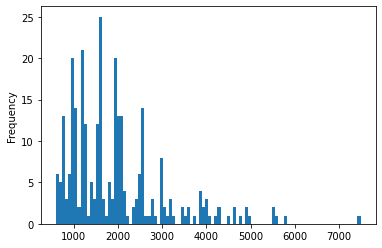

In [ ]:
df.w_size.plot.hist(bins=100)

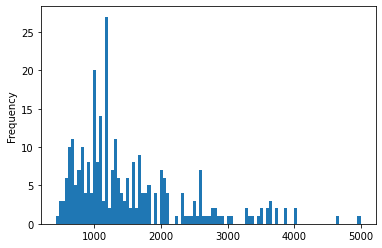

In [ ]:
df.h_size.plot.hist(bins = 100)

In [ ]:
df[['w_size','h_size']].describe()

,w_size,h_size
count,288.000000,288.000000
mean,1939.447917,1518.458333
std,1098.790059,846.274429
min,600.000000,427.000000
25%,1195.000000,990.000000
50%,1600.000000,1218.500000
75%,2448.250000,1830.250000
max,7487.000000,4991.000000


In [ ]:
df

,path,label,w_size,h_size
0,/content/drive/MyDrive/Datasets/data_bear/blac...,black,1600,1600
1,/content/drive/MyDrive/Datasets/data_bear/blac...,black,800,600
2,/content/drive/MyDrive/Datasets/data_bear/blac...,black,2125,1201
3,/content/drive/MyDrive/Datasets/data_bear/blac...,black,860,645
4,/content/drive/MyDrive/Datasets/data_bear/blac...,black,964,771
...,...,...,...,...
283,/content/drive/MyDrive/Datasets/data_bear/tedd...,teddy,1536,2048
284,/content/drive/MyDrive/Datasets/data_bear/tedd...,teddy,1200,900
285,/content/drive/MyDrive/Datasets/data_bear/tedd...,teddy,1600,1200
286,/content/drive/MyDrive/Datasets/data_bear/tedd...,teddy,900,900


In [ ]:
img = Image.open(df.path[43])

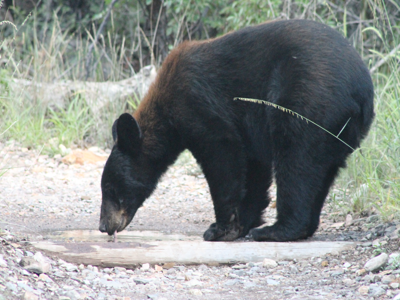

In [ ]:
img.resize((400,300))

# tf.keras ds

In [ ]:
image_size = (400,300)
batch_size = 12

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 288 files belonging to 3 classes.
Using 231 files for training.
Found 288 files belonging to 3 classes.
Using 57 files for validation.


In [ ]:
train_ds.take(1)

<TakeDataset shapes: ((None, 400, 300, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


InvalidArgumentError: ignored

<Figure size 720x720 with 0 Axes>

# handmade dataset

In [ ]:
from sklearn.model_selection import train_test_split
from numba import jit

### d4 stuff - just to take a look

In [ ]:
df.iloc[269].path

'/content/drive/MyDrive/Datasets/data_bear/teddy/00000065.png'

In [ ]:
df.iloc[259].path

'/content/drive/MyDrive/Datasets/data_bear/teddy/00000074.jpg'

In [ ]:
test = np.array(Image.open(df.path[269]).resize((400,300)))
#test = X
#test.X[0]
#test.X.shape

In [ ]:
test[:,:,:3].shape

(300, 400, 3)

In [ ]:
test[:,:,3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

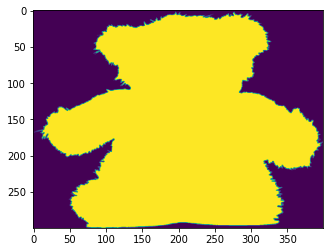

In [ ]:
plt.imshow(test[:,:,3])

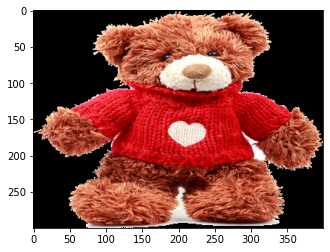

In [ ]:
plt.imshow(test[:,:,:3])

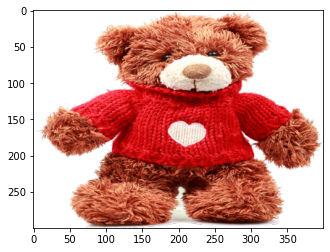

In [ ]:
plt.imshow(test[:,:,:])

In [ ]:
test[287]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

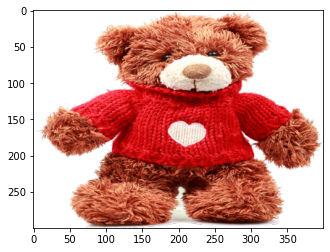

In [ ]:
plt.imshow(test)

In [ ]:
plt.imshow(X[237][:,:,3])

## preprocessing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/data_bear'
class_names = os.listdir(data_dir)

In [ ]:
%%time
X = []
for i in range(len(df)):
  (X
   .append(
       np.array(
           Image.open(df.path[i])
           .resize((400,300))
           ).astype('float32')
           [:,:,:3]/255
       )
   )

CPU times: user 30.3 s, sys: 952 ms, total: 31.3 s
Wall time: 1min 35s


In [ ]:
print(len(X))
print(X[0].shape)
print(np.array(X).shape)
#np.array(X)
#X = tf.expand_dims(np.array(X), -1)
#X.shape

288
(300, 400, 3)
(288, 300, 400, 3)


In [ ]:
y = list(df.label.map({'black':0,'grizzly':1,'teddy':2}))

In [ ]:
list_X_y=[X,y]

In [ ]:
import pickle
list_X_y=[X,y]
filename = 'list_X_y.sav'
folderpath = '/content/drive/MyDrive/Datasets/bear_plk/'
pickle.dump(list_X_y, open(folderpath+filename, 'wb'))

In [ ]:
items=[df,class_names]
pickle.dump(items, open('/content/drive/MyDrive/Datasets/bear_plk/items.plk', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42,stratify = y)
num_classes = 3
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)
X_train = tf.expand_dims(np.array(X_train), -1)
X_test = tf.expand_dims(np.array(X_test), -1)

In [ ]:
from collections import Counter
Counter(y_test)

Counter({0: 10, 1: 10, 2: 9})

# Deep IA part

### utils

In [ ]:
def plot_history(history):
  print("nb d'epoch enregistrés :",len(history.history['accuracy']))
# list all data in history
  #print(history.history.keys())
  # summarize history for accuracy
  plt.figure(figsize=(20,6))
  plt.subplot(122)
  #plt.vlines(x = len(history.history['accuracy']))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  # summarize history for loss
  plt.subplot(121)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
X_train.shape

TensorShape([259, 300, 400, 3, 1])

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6846695257759924332
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7974253463367887079
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### V 0.0

In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### First convolution & max-pooling
                             layers.Conv2D(8, kernel_size=(4, 4), activation="relu", padding="same"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Second convolution & max-pooling
                             layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),

    ### One fully connected
                             layers.Dense(10, activation="relu"),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    
    ### Model compilation
  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 400, 8)       392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 200, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 198, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 99, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 117216)            0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=12,
          validation_split=0.2,
          callbacks=[callback]
          )

In [ ]:
len(history.history['accuracy'])

7

nb d'epoch enregistrés : 7


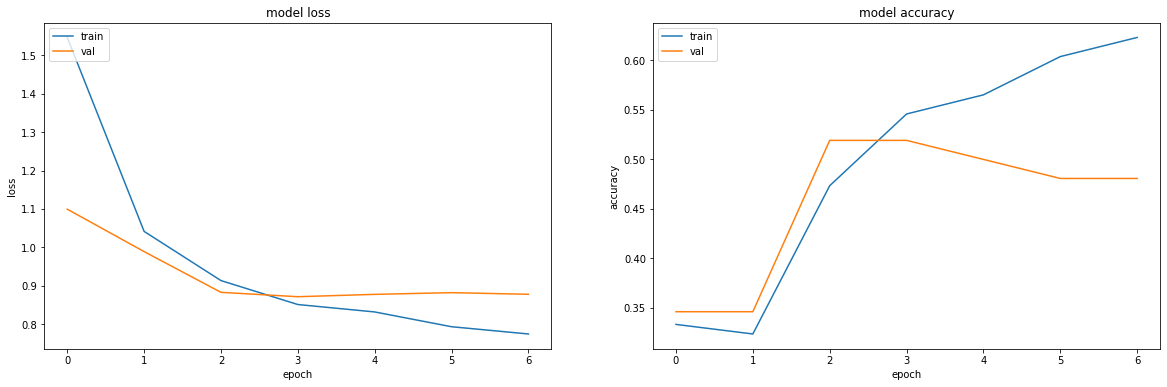

In [ ]:
plot_history(history)

### V 1.0

In [ ]:
# X_train , y_train_cat
input_shape = (300, 400, 3)
def initialize_model():
  model =  tf.keras.Sequential([
                             tf.keras.Input(shape=input_shape),        
    ### 1 convolution & max-pooling
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 2 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### 3 convolution & max-pooling
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                             layers.MaxPooling2D(pool_size=(2, 2)),
    ### Flattening
                             layers.Flatten(),
    ### fully connected
                            
                             layers.Dense(10, activation="relu"),
    ### Last layer (let's say a classification with 10 output)
                             layers.Dense(3, activation="softmax")
                             ])    

  model.compile(
      loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])
  return model


In [ ]:
model = initialize_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 297, 397, 32)      1568      
                                                                 
 conv2d_14 (Conv2D)          (None, 294, 394, 32)      16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 147, 197, 32)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 145, 195, 64)      18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 143, 193, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 71, 96, 64)       0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True
                                            )

history = model.fit(X_train, y_train_cat,
          batch_size=16,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback]
          )

Epoch 1/50
13/13 [==============================] - 16s 869ms/step - loss: 1.1067 - accuracy: 0.3043 - val_loss: 1.0973 - val_accuracy: 0.3654
Epoch 2/50
13/13 [==============================] - 5s 404ms/step - loss: 1.0927 - accuracy: 0.3913 - val_loss: 1.0566 - val_accuracy: 0.4038
Epoch 3/50
13/13 [==============================] - 5s 400ms/step - loss: 1.0392 - accuracy: 0.4396 - val_loss: 0.8951 - val_accuracy: 0.4231
Epoch 4/50
13/13 [==============================] - 5s 399ms/step - loss: 0.9233 - accuracy: 0.5507 - val_loss: 0.8152 - val_accuracy: 0.5769
Epoch 5/50
13/13 [==============================] - 5s 398ms/step - loss: 0.9714 - accuracy: 0.4734 - val_loss: 1.1008 - val_accuracy: 0.2885
Epoch 6/50
13/13 [==============================] - 5s 393ms/step - loss: 1.0983 - accuracy: 0.3527 - val_loss: 1.1012 - val_accuracy: 0.2885
Epoch 7/50
13/13 [==============================] - 5s 393ms/step - loss: 1.0982 - accuracy: 0.3527 - val_loss: 1.1013 - val_accuracy: 0.2885
Epoch

nb d'epoch enregistrés : 9


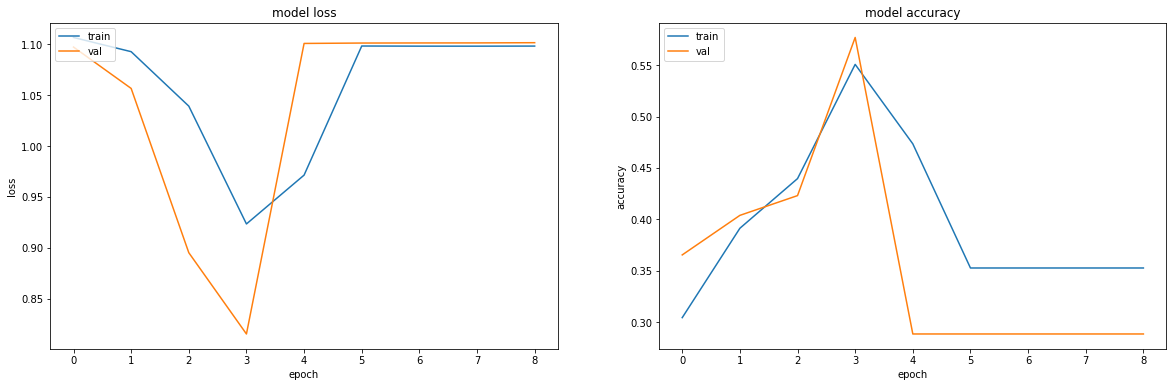

In [ ]:
plot_history(history)